In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
base_dir = "/content/drive/My Drive/cancer"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

bkl_train_dir = os.path.join(train_dir, 'Bengign keratosis')
Melanoma_train_dir = os.path.join(train_dir, 'Melanoma')
no_train_dir = os.path.join(train_dir, 'No cancer')

bkl_validation_dir = os.path.join(validation_dir, 'Bengign keratosis')
no_validation_dir = os.path.join(validation_dir, 'No cancer')
Melanoma_validation_dir = os.path.join(validation_dir, 'Melanoma')




In [ ]:
print(os.listdir("/content/drive/My Drive/cancer/train"))

['No cancer', 'Melanoma', 'Bengign keratosis']


In [ ]:
# Count the number of images in each category (Training)
num_bkl_train = len(os.listdir(bkl_train_dir))
num_Melanoma_train = len(os.listdir(Melanoma_train_dir))
num_no_train = len(os.listdir(no_train_dir))

# Count the number of images in each category (Validation)
num_bkl_validation = len(os.listdir(bkl_validation_dir))
num_Melanoma_validation = len(os.listdir(Melanoma_validation_dir))
num_no_validation = len(os.listdir(no_validation_dir))

# Calculate total images
total_train = num_bkl_train + num_Melanoma_train + num_no_train
total_validation = num_bkl_validation + num_Melanoma_validation + num_no_validation  # Added this

# Print the results
print('Total validation No cancer images:', num_no_validation)  # Fixed variable name
print('--')
print('Total training images:', total_train)
print('Total validation images:', total_validation)


Total validation No cancer images: 1019
--
Total training images: 6993
Total validation images: 3032


Train , Test and Validation Set Generation


Train Generator-(Pre-Processing) or augmentation

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=45,
                                           width_shift_range=.15,
                                           height_shift_range=.15,
                                           zoom_range=0.5,
                                           horizontal_flip=True,
                                           vertical_flip=False)

print(train_image_generator)

Validation Generator-(Pre-processing)

In [ ]:
validation_image_generator = ImageDataGenerator(rescale=1./255)



In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=3,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(150,150),
                                                           class_mode='binary',
                                                           color_mode='rgb')

validation_data_gen = validation_image_generator.flow_from_directory(batch_size=3,
                                                                     directory=validation_dir,
                                                                    target_size=(150,150),
                                                                    class_mode='binary',
                                                                    color_mode='rgb')


Found 6993 images belonging to 3 classes.
Found 3032 images belonging to 3 classes.


In [ ]:
def classLabel(source=None):
  datagen = ImageDataGenerator(rescale=1./255)
  data_generator = datagen.flow_from_directory(
      source)
  class_dictionary = data_generator.class_indices
  return data_generator , class_dictionary

labels = classLabel(train_dir)
print(labels)

Found 6993 images belonging to 3 classes.
(<keras.src.legacy.preprocessing.image.DirectoryIterator object at 0x78af65585b50>, {'Bengign keratosis': 0, 'Melanoma': 1, 'No cancer': 2})


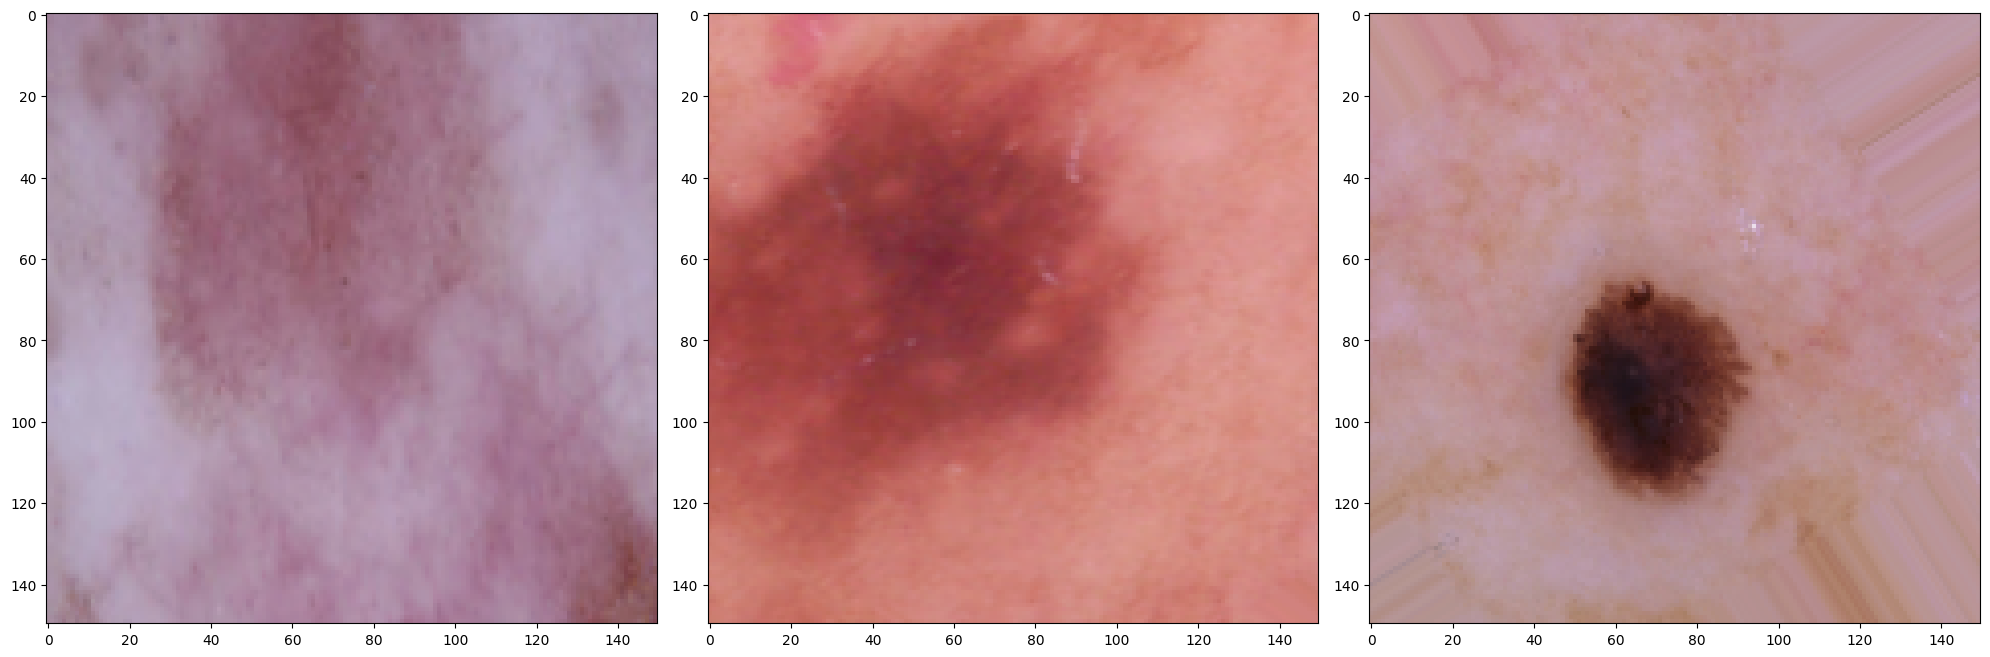

In [ ]:
sample_training_images,_ = next(train_data_gen)

def plotImages(images_arr):
  fig, axes = plt.subplots(1, 3, figsize=(20, 20))
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

plotImages(sample_training_images[:3])



**Model Training**

In [ ]:
model = Sequential()
model.add(Conv2D(16, 3,padding = 'same' , activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(Conv2D(32, 3,padding = 'same' , activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, 3,padding = 'same' , activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    10,617,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,642,467 (40.60 MB)

 Trainable params: 10,642,467 (40.60 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = model.fit(
      train_data_gen,
          steps_per_epoch=3,
              epochs=100,
                  validation_data=validation_data_gen,
                      validation_steps=3,
                          verbose=2  # Make sure there are no extra spaces in `verbose=2`
                          )



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
3/3 - 60s - 20s/step - accuracy: 0.4444 - loss: 4.1915 - val_accuracy: 0.1111 - val_loss: 1.7082
Epoch 2/100
3/3 - 114s - 38s/step - accuracy: 0.5556 - loss: 1.2649 - val_accuracy: 0.3333 - val_loss: 1.1411
Epoch 3/100
3/3 - 23s - 8s/step - accuracy: 0.2222 - loss: 1.4850 - val_accuracy: 0.1111 - val_loss: 1.1551
Epoch 4/100
3/3 - 21s - 7s/step - accuracy: 0.2222 - loss: 1.1409 - val_accuracy: 0.3333 - val_loss: 1.1023
Epoch 5/100
3/3 - 18s - 6s/step - accuracy: 0.2222 - loss: 1.0942 - val_accuracy: 0.3333 - val_loss: 1.0990
Epoch 6/100
3/3 - 18s - 6s/step - accuracy: 0.5556 - loss: 1.0933 - val_accuracy: 0.3333 - val_loss: 1.0984
Epoch 7/100
3/3 - 14s - 5s/step - accuracy: 0.6667 - loss: 1.0820 - val_accuracy: 0.1111 - val_loss: 1.1090
Epoch 8/100
3/3 - 15s - 5s/step - accuracy: 0.3333 - loss: 1.0984 - val_accuracy: 0.2222 - val_loss: 1.1018
Epoch 9/100
3/3 - 32s - 11s/step - accuracy: 0.5556 - loss: 1.0626 - val_accuracy: 0.2222 - val_loss: 1.1509
Epoch 10/100
3/3 - 19s -

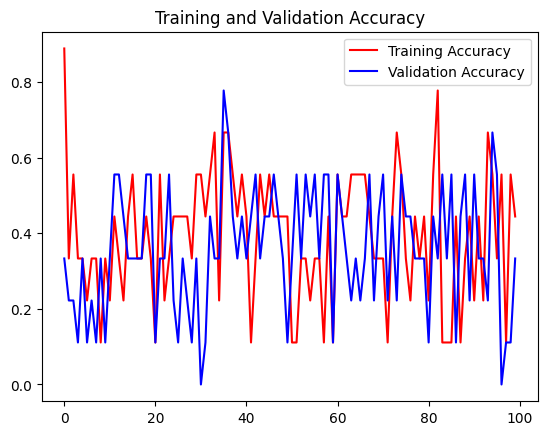

<Figure size 640x480 with 0 Axes>

In [ ]:
acc=history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))


plt.plot(epochs_range,acc,'r',label='Training Accuracy')
plt.plot(epochs_range,val_acc,'b',label='Validation Accuracy')
plt.legend(loc=0)
plt.title('Training and Validation Accuracy')

plt.figure()
plt.show()